In [105]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

In [106]:
# keras 라는 독자적인 module 이 있지만, 대세는 tensorflow 에 들어간 keras 이다.

## Simple linear regression

In [107]:
X = np.array([1,2,3,4,5,6])
y = np.array([10,20,30,40,50,60])

In [124]:
# 모델구성할떄에는 먼저 sequential 이라는 인스턴스를 먼저 형성해야한다.
model = keras.models.Sequential() 
model.add(keras.layers.Dense(1,input_dim=1, activation='linear'))
# 맨 앞의 1 : 출력인자. 즉 output 은 1dim 의 vector 가 될 것이다.
# input_dim : 입력인자 X 의 dim 이 1이므로 1
# optimizer 먼저 정의하자. 그냥 뒤 compile 에서 opimizer='sgd' 를 써버리면 optimizer 의 파라메터들을 우리 입맛대로 조종할 수가 없다.
sgd = keras.optimizers.SGD(lr=0.01) 
# SGD : stochastic gradient descent 의 방법으로 최적화를 하겠다는 뜻.
# lr : learning rate 로서, 0.01 을 사용
model.compile(optimizer = sgd,  # 최적화는 위에서 튜닝한 sgd 사용
              loss='mse', # 회귀분석이므로 손실함수는 mse
              metrics=['mse']) # 회귀이므로 평가 기준도 mse 로 하자.
model.fit(X, y, 
          batch_size=1, #데이터를 몇개씩 묶어서 J 구하고 학습할지. 여기서는 1을 사용?
          epochs=10, # 총 데이터를 10번 학습을 시키겠다는뜻
          shuffle = False, # 학습하면서 set 을 random 하게 섞을지
          verbose = 0) # 학습이 이루어지는 과정을 직접 볼지 안볼지 (default = 1 로 과정을 볼 수 있다.)
# 모델 예측
print(model.predict([7]))

[[0.99134004]]


## Multi linear regression

In [125]:
X_train = np.array([[73,80,75],
                   [63,80,75],
                   [93,88,93],
                   [89,90,90],
                   [96,98,100],
                   [73,66,70]])
y_train = np.array([72,88,92,81,100,71])
X_test = np.array([[90,88,93],
                   [70,70,70]])
y_test = np.array([90,68])

In [127]:
# 모델구성
model = keras.Sequential()
model.add(keras.layers.Dense(1,input_dim=3, activation='linear'))
# 맨 앞의 1 : 출력인자. 즉 output 은 1dim 의 vector 가 될 것이다.
# input_dim : 입력인자 X 의 dim 이 3이므로 3
# 모델 컴파일
sgd = keras.optimizers.SGD(lr=0.00001) 
# lr : learning rate 로서, 0.01 을 사용
model.compile(optimizer = sgd,  # 최적화는 sgd 사용
              loss='mse', # 손실함수는 mse 
              metrics=['mse', 'mae', 'mape']) # metrics 는 모델의 평가 기준. 
# 모델학습
fit = model.fit(X_train, y_train, 
               batch_size=1, # 데이터 셋이 있을때 몇개씩 묶어서 볼것인가
               epochs=10,
               validation_split=0.2,# 10번 학습을 시키겠다는뜻
               shuffle =False,
               verbose=0) # 학습하면서 set 을 random 하게 섞을지

In [128]:
fit.params

{'batch_size': 1,
 'epochs': 10,
 'steps': 4,
 'samples': 4,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss',
  'mse',
  'mae',
  'mape',
  'val_loss',
  'val_mse',
  'val_mae',
  'val_mape']}

In [129]:
fit.history

{'loss': [6866.437660217285,
  594.2113513946533,
  443.38714694976807,
  431.17198419570923,
  427.4053649902344,
  424.5271906852722,
  421.7672700881958,
  419.03828716278076,
  416.3306872844696,
  413.64295744895935],
 'mse': [6866.438,
  594.21136,
  443.38715,
  431.172,
  427.40536,
  424.5272,
  421.76724,
  419.0383,
  416.3307,
  413.64294],
 'mae': [71.13911,
  20.346478,
  17.871784,
  17.532192,
  17.438614,
  17.373554,
  17.311962,
  17.250946,
  17.1902,
  17.12967],
 'mape': [88.23591,
  24.29582,
  20.745039,
  20.272907,
  20.15545,
  20.07906,
  20.007607,
  19.936928,
  19.866573,
  19.79647],
 'val_loss': [285.5102119445801,
  41.32874774932861,
  34.58246898651123,
  33.78582763671875,
  33.40067958831787,
  33.063809394836426,
  32.736586570739746,
  32.41434574127197,
  32.096495628356934,
  31.783002853393555],
 'val_mse': [285.51022,
  41.328747,
  34.58247,
  33.785828,
  33.40068,
  33.06381,
  32.736588,
  32.414345,
  32.096497,
  31.783003],
 'val_mae':

In [130]:
fit.params

{'batch_size': 1,
 'epochs': 10,
 'steps': 4,
 'samples': 4,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss',
  'mse',
  'mae',
  'mape',
  'val_loss',
  'val_mse',
  'val_mae',
  'val_mape']}

### taining 과정

In [131]:
fit.history # loss 와  metric(모델평가기준) 의 epoch 별 추이를 보여준다.

{'loss': [6866.437660217285,
  594.2113513946533,
  443.38714694976807,
  431.17198419570923,
  427.4053649902344,
  424.5271906852722,
  421.7672700881958,
  419.03828716278076,
  416.3306872844696,
  413.64295744895935],
 'mse': [6866.438,
  594.21136,
  443.38715,
  431.172,
  427.40536,
  424.5272,
  421.76724,
  419.0383,
  416.3307,
  413.64294],
 'mae': [71.13911,
  20.346478,
  17.871784,
  17.532192,
  17.438614,
  17.373554,
  17.311962,
  17.250946,
  17.1902,
  17.12967],
 'mape': [88.23591,
  24.29582,
  20.745039,
  20.272907,
  20.15545,
  20.07906,
  20.007607,
  19.936928,
  19.866573,
  19.79647],
 'val_loss': [285.5102119445801,
  41.32874774932861,
  34.58246898651123,
  33.78582763671875,
  33.40067958831787,
  33.063809394836426,
  32.736586570739746,
  32.41434574127197,
  32.096495628356934,
  31.783002853393555],
 'val_mse': [285.51022,
  41.328747,
  34.58247,
  33.785828,
  33.40068,
  33.06381,
  32.736588,
  32.414345,
  32.096497,
  31.783003],
 'val_mae':

In [132]:
history = pd.DataFrame(fit.history)
history

,loss,mse,mae,mape,val_loss,val_mse,val_mae,val_mape
0,6866.437660,6866.437988,71.139107,88.235909,285.510212,285.510223,14.687225,15.980553
1,594.211351,594.211365,20.346478,24.295820,41.328748,41.328747,6.145733,7.015585
2,443.387147,443.387146,17.871784,20.745039,34.582469,34.582470,5.864414,6.972795
3,431.171984,431.171997,17.532192,20.272907,33.785828,33.785828,5.805080,6.930433
4,427.405365,427.405365,17.438614,20.155451,33.400680,33.400681,5.771400,6.888252
5,424.527191,424.527191,17.373554,20.079060,33.063809,33.063808,5.740761,6.846218
6,421.767270,421.767242,17.311962,20.007607,32.736587,32.736588,5.710571,6.804333
7,419.038287,419.038300,17.250946,19.936928,32.414346,32.414345,5.680523,6.762594
8,416.330687,416.330688,17.190201,19.866573,32.096496,32.096497,5.650578,6.720994
9,413.642957,413.642944,17.129669,19.796471,31.783003,31.783003,5.620735,6.679532


In [133]:
# 판단기준 중에서 mse 를 이용하도록 하자.
hist=history[['mse','val_mse']]
hist

,mse,val_mse
0,6866.437988,285.510223
1,594.211365,41.328747
2,443.387146,34.582470
3,431.171997,33.785828
4,427.405365,33.400681
5,424.527191,33.063808
6,421.767242,32.736588
7,419.038300,32.414345
8,416.330688,32.096497
9,413.642944,31.783003


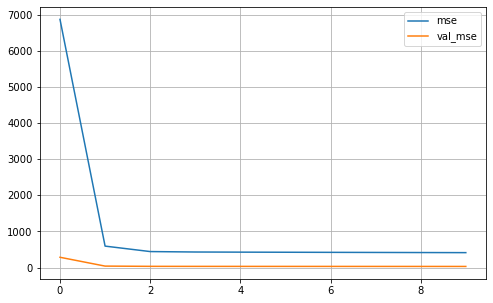

In [134]:
# mae /mape 를 이용해서 학습 그래프 그리기
hist.plot(figsize=(8, 5))
plt.grid(True) 
# grid 를 그려주면 뭔가 이뻐보인다..
# 아래 x 축은 epoch 이다. 
# 처음에 val 값이 더 좋아보이는건 mse 는 epoch 도중 계산되고 val 은 epoch 끝나고 계산되기떄문

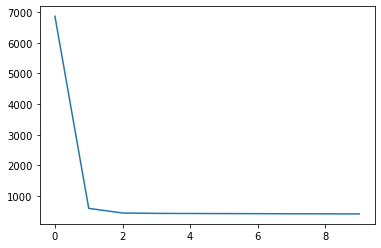

In [135]:
# loss 그리기
# 사실 loss 를 mse 로 설정해서 이렇게 그리나 마나이긴 하다..
history['loss'].plot();

### 예측 및 평가

In [136]:
# 여따가는 우리가 예측하고싶은 값을 넣어야겟죠?
model.predict(X_test)

array([[90.35179],
       [69.20048]], dtype=float32)

In [137]:
# 여따가는 test set 을 넣어서 평가할 수 있습니다.! 
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 61ms/sample - loss: 0.7825 - mse: 0.7825 - mae: 0.7761 - mape: 1.0781


[0.7824518084526062, 0.7824518, 0.7761345, 1.0781437]

## Logistic regression

In [138]:
X = np.array([-10,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,0,0,0,0,0,0,0,1,1,1])

In [140]:
# 모델구성
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_dim=1, activation='sigmoid'))
# binary y 에 대한 logistic 을 하려고 하므로 출력층은 sigmoid , loss 는 binary_crossentropy , metric 은 binary_accueacy 를 해야한다.
# 모델 컴파일
sgd = keras.optimizers.SGD(lr=0.01) 
model.compile(optimizer = sgd,  # 최적화는 sgd 사용
              loss='binary_crossentropy', # binary 경우의 로지스틱이므로 binary crossentropy 사용
              metrics=['binary_accuracy']) # metrics 는 모델의 평가 기준. 
# 모델학습
fit = model.fit(X, y, 
          batch_size=1, 
          epochs=10, # 10번 학습을 시키겠다는뜻
          shuffle =False,
          verbose=0) # 학습하면서 set 을 random 하게 섞을지

In [141]:
fit.history

{'loss': [3.754439051604343,
  2.574541667222299,
  1.5143419856374913,
  0.86681098558686,
  0.7264655340801586,
  0.7156600843776356,
  0.7106220559640364,
  0.7043420753695748,
  0.6976526515050367,
  0.6909848803823645],
 'binary_accuracy': [0.6363636,
  0.6363636,
  0.6363636,
  0.6363636,
  0.36363637,
  0.27272728,
  0.36363637,
  0.36363637,
  0.36363637,
  0.36363637]}

### Training 과정

In [142]:
# val set 을 지정해주지 않아서 loss

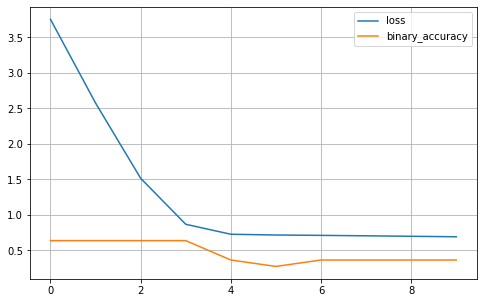

In [143]:
history = pd.DataFrame(fit.history)
history.plot(figsize=(8, 5))
plt.grid(True) 

### 예측

In [144]:
# x 가 9.4 일떄 label 이 1일 확률은...???
model.predict([9.4])

array([[0.700083]], dtype=float32)

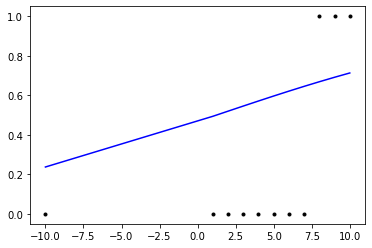

In [145]:
# X 에 대한 예측 시각화
plt.plot(X,model.predict(X),'b') # blue 그래프를 그리고싶으므로 'b'
plt.plot(X,y,'k.') # plot 을 검은점으로 하려므로 k.

In [146]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 와인 데이터셋 연습

In [147]:
from sklearn.datasets import load_wine
wine = load_wine()

In [148]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [149]:
df.shape

(178, 14)

In [150]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [151]:
# y 레이블이 3개이므로 다중분류일것이다.
pd.Series(y).value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [62]:
# 모델구성
model = keras.Sequential()
model.add(keras.layers.Dense(20,input_dim=13, activation='relu')) 
model.add(keras.layers.Dense(10,activation='relu')) # hidden layer
model.add(keras.layers.Dense(3,activation = 'softmax')) 
# multi class 분류이므로 output은 3, 여기에서는 softmax 를 써주어야한다.

# 모델 컴파일
sgd = keras.optimizers.SGD(lr=0.01) # optimizer 정의
model.compile(optimizer = sgd,  # 최적화는 sgd 사용
              loss='sparse_categorical_crossentropy',  # y lable 이 ont-hot encoding 된 상태가 아니기떄문에 sparse 사용
              metrics=['accuracy']) 
# 모델학습
fit = model.fit(X, y, 
          batch_size=10, # 데이터 셋이 있을때 몇개씩 묶어서 볼것인가
          epochs= 20, # 10번 학습을 시키겠다는뜻
          shuffle =False)

Train on 178 samples
Epoch 1/20
178/178 [==============================] - 0s 1ms/sample - loss: 207.6157 - accuracy: 0.5562
Epoch 2/20
178/178 [==============================] - 0s 84us/sample - loss: 1.0999 - accuracy: 0.3427
Epoch 3/20
178/178 [==============================] - 0s 106us/sample - loss: 1.0989 - accuracy: 0.3989
Epoch 4/20
178/178 [==============================] - 0s 84us/sample - loss: 1.0980 - accuracy: 0.3989
Epoch 5/20
178/178 [==============================] - 0s 123us/sample - loss: 1.0972 - accuracy: 0.3989
Epoch 6/20
178/178 [==============================] - 0s 112us/sample - loss: 1.0964 - accuracy: 0.3989
Epoch 7/20
178/178 [==============================] - 0s 112us/sample - loss: 1.0958 - accuracy: 0.3989
Epoch 8/20
178/178 [==============================] - 0s 98us/sample - loss: 1.0952 - accuracy: 0.3989
Epoch 9/20
178/178 [==============================] - 0s 115us/sample - loss: 1.0947 - accuracy: 0.3989
Epoch 10/20
178/178 [=========================

In [63]:
model.summary() #모델 자체는 좀 안좋은거같다.... 데이터가 너무 적어서 그런듯? 특성도 많고 데이터도 좀 어렵구.. 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 33        
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


## iris 데이터 꽃 유형분류 연습

In [27]:
from sklearn.datasets import load_iris
data = load_iris()

In [28]:
X = data.data
y = data.target

In [29]:
pd.Series(y).value_counts()

2    50
1    50
0    50
dtype: int64

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16,input_dim=4,activation='relu'))
model.add(keras.layers.Dense(3,activation = 'softmax')) 
# y 카테로리가 3개이므로 output 에 3 을 넣었다.
# 다중 카테고리 분류에서는 activation 이 softmax 함수를 맨 마지막에 넣어주어야한다.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])
fit = model.fit(X,y, epochs=100, batch_size = 10,verbose = 0) 
#verbose = 0 은 학습과정 보기 싫을떄.

### 데이터 label encoder 하기

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
#label encoder
xx = np.array(['dog','cat','bird','fish'])

In [33]:
encoder = LabelEncoder()
encoder.fit(xx)
yy = encoder.transform(xx)
print(yy)

[2 1 0 3]


In [34]:
# encoder 를 거꾸로 실행
print(encoder.inverse_transform(yy))

['dog' 'cat' 'bird' 'fish']


In [35]:
# one hot encoding
from keras.utils import np_utils
YY = np_utils.to_categorical(yy)

Using TensorFlow backend.


In [36]:
print(YY)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


### 데이터 one hot encoder 해서 분류하기

In [37]:
# label encoder 
# 값들이 수치형이 아니라 categorical 일때에 one hot encoder 를 위해 수치형으로 변환해야한다.
# 물론 지금은 y data 가 0,1,2 로 이쁘게 되어있지만 안 그런 경우가 더 많다.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # 객채선안
encoder.fit(y) # fit method
y = encoder.transform(y) # transform method

In [38]:
# onehot encoder
from keras.utils import np_utils
y = np_utils.to_categorical(y)

In [39]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16,input_dim=4,activation='relu'))
model.add(keras.layers.Dense(3,activation = 'softmax')) 
# y 카테로리가 3개이므로 output 에 3 을 넣었다.
# 다중 카테고리 분류에서는 activation 이 softmax 함수를 맨 마지막에 넣어주어야한다.
model.compile(loss='categorical_crossentropy', # one hot encoding 되었으므로 이 loss 를 써주어야 ㅎ나다.
              optimizer= 'adam',
              metrics=['accuracy'])
fit = model.fit(X,y, epochs=100, batch_size = 10,verbose = 0) 
#verbose = 0 은 학습과정 보기 싫을떄.

## 이미지 분류기

### 데이터 전처리 및 데이터 살펴보기

In [64]:
#MNIST 데이터셋 load 하기. 이미 train/test set 이 나누어져있는 상태이기떄문에 data load 할떄에 train/test 를 모두 로드하자.
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [65]:
# 훈련 세트는 60,000개의 흑백 이미지입니다. 각 이미지의 크기는 28x28 픽셀입니다:
X_train_full.shape

(60000, 28, 28)

In [66]:
# 각 픽셀의 강도는 바이트(0~255)로 표현된다.
X_train_full.dtype

dtype('uint8')

In [67]:
# 전체 훈련 세트를 valid set 과 train set 으로 나누자. (학습에 대한 추이를 보기 위함.)
# 그리고 픽셀의 강도를 0~1 의 값을 가지도록 설정하자. 
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

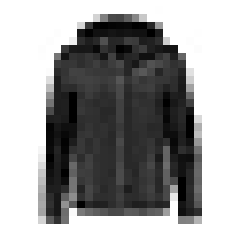

In [68]:
#맷플롯립의 `imshow()` 함수와 `'binary'` 컬러맵을 사용해 이미지를 출력할 수 있습니다:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off') # axis 를 off 해서 없애자.
plt.show()

In [69]:
# 레이블은 0에서 9까지 (uint8로 표현된) 클래스 아이디 이다.
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [70]:
# 클래스 이름은 다음과 같습니다:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [71]:
# 훈련 세트에 있는 첫 번째 이미지는 코트이다.
class_names[y_train[0]]

'Coat'

In [72]:
#검증 세트는 5,000개의 이미지를 담고 있고 테스트 세트는 10,000개의 이미지를 가집니다:
X_valid.shape

(5000, 28, 28)

In [73]:
X_test.shape

(10000, 28, 28)

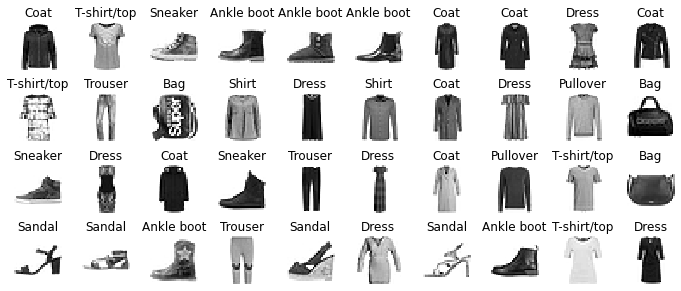

In [74]:
# 이 데이터셋에 있는 샘플 이미지를 몇 개 출력해 보자,
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 모델 구성하기

In [76]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28, 28])) # flatten 층은 입력 이미지를 1d vector 로 변환한다.
model.add(keras.layers.Dense(300, activation="relu"))# 뉴런 300 개를 가지는 hidden layer 를 추가한다. # activation 은 relu 사용
model.add(keras.layers.Dense(100, activation="relu"))# 이번에는 뉴런 100개를 가지는 hidden layer 를 또 추가한다.
model.add(keras.layers.Dense(10, activation="softmax"))# 마지막 출력은 다중 lable 문제이므로 softmax 를 사용한다.
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [80]:
# flatten 이 없으면 이렇게 첫 28*28 의 x 데이터를 모두 활용하지 못하게 된다.
model1 = keras.models.Sequential()
model1.add(keras.layers.Dense(300,activation='relu',input_shape=[28,28]))
model1.add(keras.layers.Dense(100,activation='relu'))
model1.add(keras.layers.Dense(10,activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_4 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_5 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


In [81]:
keras.backend.clear_session() # tf.keras.backend.clear_session(). Resets all state generated by Keras.
np.random.seed(42) # 재현성을 높히기 위해 random 고정
tf.random.set_seed(42) # same as above

In [82]:
# 이런식으로도 구성할 수 있다.  나는 맨 위 방법이 층을 쌓아간다는 느낌이 더 강해서 더 좋은거같다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

### 모델 살펴보기

In [83]:
model.summary()
# 파라미터가 매우 많다. 모델이 유연하다는 의미도 있지만, 과대적합의 위험도 있다. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [84]:
# 레이어 살펴보기
model.layers

In [85]:
#레이어를 선택할 수 있다.
hidden1 = model.layers[1]
hidden1.name

'dense'

In [86]:
# get_wights() method 를 통해서 모든 층의 파라미터를 조사할 수 있다.
weights, biases = hidden1.get_weights() # dense 층의 경우 연결 가중치(w) 와 편향(b) 가 모두 표시된다.

In [87]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [88]:
weights.shape

(784, 300)

In [89]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [90]:
biases.shape

(300,)

In [91]:
model.compile(loss="sparse_categorical_crossentropy", 
              # y variable 이 원 핫 인코딩이 아닌 상태에서 cross entropy 를 계산하는 loss , 즉 그냥 corss entropy 라고 생각하자
              # 여기서는 정답 레이블이 0~9 인 1dim vector 이므로 sparse 를 사용
              optimizer="sgd",
              metrics=["accuracy"]) 

In [92]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid)) # 이 떄에는 학습의 추이를 살펴보려고 val date를 추가하였다.

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.7226 - accuracy: 0.7642 - val_loss: 0.5075 - val_accuracy: 0.8314
Epoch 2/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.4843 - accuracy: 0.8321 - val_loss: 0.4538 - val_accuracy: 0.8486
Epoch 3/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.4413 - accuracy: 0.8465 - val_loss: 0.4385 - val_accuracy: 0.8490
Epoch 4/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4128 - accuracy: 0.8549 - val_loss: 0.4163 - val_accuracy: 0.8562
Epoch 5/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3926 - accuracy: 0.8617 - val_loss: 0.3817 - val_accuracy: 0.8636
Epoch 6/30
55000/55000 [==============================] - 3s 55us/sample - loss: 0.3770 - accuracy: 0.8667 - val_loss: 0.3729 - val_accuracy: 0.8680
Epoch 7/30
55000/55000 [==============================] -

In [93]:
history.params #모델적합이 어떻게 이루어졌는지에 대해서 간략하게 history 제공

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [94]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### training 과정

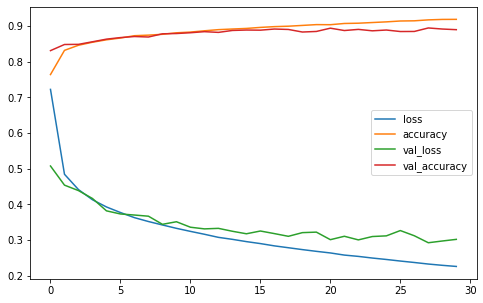

In [95]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

### 모델 평가

In [96]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3348 - accuracy: 0.8788


[0.3347936288356781, 0.8788]

### 모델 예측하기

In [97]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2) #각각 0~ 9 class 마다 각각의 확률을 모델이 추정하였다.

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [98]:
# 가장 높은 클래스에만 관심이 있으면 model.predict_classes 를 쓴다.
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [99]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [100]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

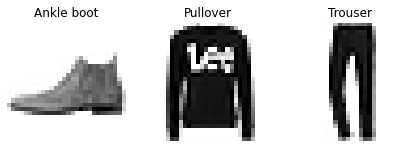

In [101]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 캘리포니아 주택 예측

In [102]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) 
# test size 는 default 로 0.25
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
# 이 역시 valid size 는 defaualt 로 0.25

# X data scaling
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid) 
# data leakage 가 일어나지 않게 하려면 x_train 의 특성만 이용해야 하기 때문에, transform 만 적용
X_test = scaler.transform(X_test)

In [103]:
X_train.shape

(11610, 8)

In [104]:
np.random.seed(42)
tf.random.set_seed(42)

### 모델구성

In [78]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30,activation='relu',input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(1)) #잡음이 많은 데이터의 경우, weight 가 많으면 과적합시 엄청 큰 문제가 생기므로, hidden layer 를 더 늘리지 않고 바로출력층을 쌓자.
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mse'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
evaluation = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 49us/sample - loss: 1.6205 - mse: 1.6205 - val_loss: 2.0374 - val_mse: 2.0374
Epoch 2/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.7162 - mse: 0.7162 - val_loss: 0.6571 - val_mse: 0.6571
Epoch 3/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.6356 - mse: 0.6356 - val_loss: 0.5996 - val_mse: 0.5996
Epoch 4/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5989 - mse: 0.5989 - val_loss: 0.5662 - val_mse: 0.5662
Epoch 5/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5713 - mse: 0.5713 - val_loss: 0.5489 - val_mse: 0.5489
Epoch 6/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5491 - mse: 0.5491 - val_loss: 0.5204 - val_mse: 0.5204
Epoch 7/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5301 - mse: 0.5301 - val_loss: 0.5

### Training 과정

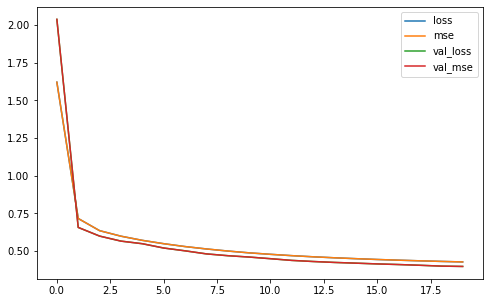

In [79]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()
# loss/mse 가 같아서 그냥 같게 나오긴 한다.

In [80]:
X_new = X_test[:3] # 3개 테이터
y_pred = model.predict(X_new)
y_pred # 그에 대한 prediction y 값

array([[0.37310064],
       [1.6790789 ],
       [3.0817137 ]], dtype=float32)